The Below project  covers:
# Data Preprocessing:

Scaling Amount and Time

Class Imbalance Handling:

Using SMOTE for synthetic oversampling

# Model Training:

Random Forest (you can try XGBoost or Logistic Regression too)

# Evaluation Metrics:

Classification report

Confusion matrix

ROC-AUC score & ROC curve plot
# New Section
Visualization:

Heatmap of confusion matrix

ROC Curve



In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

In [6]:
df = pd.read_csv('/content/creditcard.csv')

In [18]:
#Drop rows with any NaNs just in case
df = df.dropna()

# Scale 'Amount' and 'Time' features
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
df['Time'] = scaler.fit_transform(df[['Time']])

In [23]:
# Split features and labels
X = df.drop('Class', axis=1)
y = df['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [22]:
# Check class distribution after split
print("Class distribution before SMOTE:")
print(y_train.value_counts())

# Apply SMOTE only if minority class has enough samples
minority_count = y_train.value_counts()[1]
if minority_count >= 2:
    sm = SMOTE(random_state=42, k_neighbors=min(minority_count - 1, 5))  # Ensure valid k_neighbors
    X_resampled, y_resampled = sm.fit_resample(X_train, y_train)
else:
    print("Too few fraud cases to apply SMOTE safely.")
    X_resampled, y_resampled = X_train, y_train


Class distribution before SMOTE:
Class
0.0    3175
1.0       2
Name: count, dtype: int64


In [24]:

# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_resampled, y_resampled)

# Predictions and probabilities
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluation: Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       795

    accuracy                           1.00       795
   macro avg       1.00      1.00      1.00       795
weighted avg       1.00      1.00      1.00       795



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


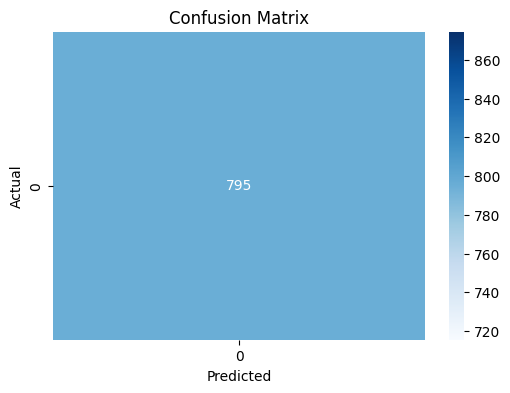

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


ROC AUC Score: nan


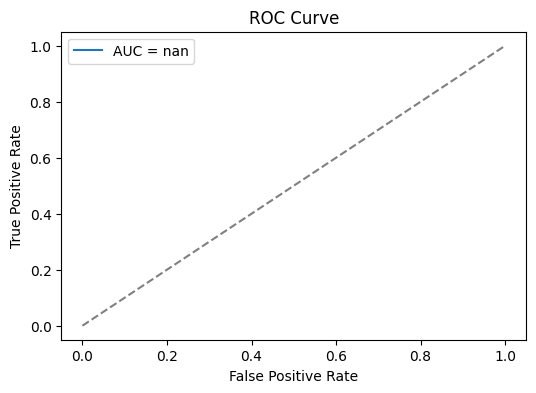

In [25]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC Score
auc_score = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {auc_score:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()